In [3]:
import pandas as pd
import numpy as np
import mysql.connector

In [4]:
conn  = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    password = 'Madesh6554@12',
    database = 'satellite_data'
)

In [16]:
df = pd.read_csv(r"C:\Users\mades\Downloads\satellite dataset\Original dataset\satellite_telemetry_data.csv")
df

,Timestamp,Battery Voltage (V),Battery Current (A),State of Charge (%),Solar Panel Voltage (V),Solar Panel Current (A),Solar Panel Efficiency (%),Power Consumption (W),Internal Temperature (C),Battery Temperature (C),...,Bit Error Rate,Redundant Sensor Discrepancies (0/1),Thruster Malfunctions (0/1),Thruster Efficiency (%),Satellite Orientation (°),Data Throughput (Mbps),Power System Anomalies (0/1),Thermal System Anomalies (0/1),AOCS Faults (0/1),Payload Failures (0/1)
0,21-02-2025 00:00,27.663657,1.198668,49.747676,34.450280,1.538837,78.858183,287.625076,27.425388,29.336524,...,0.002098,0,0,95.550449,85.803526,72.383849,0,0,0,0
1,21-02-2025 00:00,23.690421,5.256486,60.799818,43.339668,2.876521,93.968375,421.761029,26.474492,25.216930,...,0.009207,0,0,99.384409,277.466628,19.009831,0,0,0,0
2,21-02-2025 00:00,27.683408,1.148736,34.159514,39.441033,3.175850,83.388523,472.742796,23.836097,21.506227,...,0.001557,0,0,93.026799,348.796261,81.056144,0,0,0,0
3,21-02-2025 00:00,24.693368,-1.915186,63.793816,49.520640,2.512940,95.186233,393.258005,21.737029,27.930695,...,0.008302,0,0,97.763768,107.071250,91.198533,0,0,0,0
4,21-02-2025 00:00,26.866385,10.069036,60.840302,38.947523,2.261755,95.496608,480.209425,20.981227,21.729351,...,0.003185,0,0,93.447386,160.991069,52.074967,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,26-02-2025 18:52,24.918752,-0.803144,52.951558,41.553782,3.510285,89.696518,173.477333,26.111055,28.657352,...,0.001415,0,0,89.712973,82.567854,54.518194,0,0,0,0
99996,26-02-2025 18:53,25.480349,-2.227133,30.194564,40.195035,1.636767,97.769038,155.472934,24.425567,33.432067,...,0.000842,0,0,81.622488,99.944938,15.539072,0,0,0,0
99997,26-02-2025 18:53,25.580797,-7.360854,69.631371,46.276700,1.892074,86.419607,471.957286,27.595192,21.751422,...,0.002103,0,0,94.950784,158.219524,13.588880,0,0,0,0
99998,26-02-2025 18:53,26.127245,-1.561563,36.314000,48.322525,0.413896,82.278208,331.697548,29.569326,29.414988,...,0.009265,1,0,98.475454,332.004822,83.425422,0,0,0,0


In [17]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

C:\Users\mades\AppData\Local\Temp\ipykernel_22328\766710655.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Timestamp                             100000 non-null  datetime64[ns]
 1   Battery Voltage (V)                   100000 non-null  float64       
 2   Battery Current (A)                   100000 non-null  float64       
 3   State of Charge (%)                   100000 non-null  float64       
 4   Solar Panel Voltage (V)               100000 non-null  float64       
 5   Solar Panel Current (A)               100000 non-null  float64       
 6   Solar Panel Efficiency (%)            100000 non-null  float64       
 7   Power Consumption (W)                 100000 non-null  float64       
 8   Internal Temperature (C)              100000 non-null  float64       
 9   Battery Temperature (C)               100000 non-null  float

In [20]:
df['Spectral Sensor Health'].value_counts()  # 1 - Healthy     , 0 - Degraded     

Spectral Sensor Health
Healthy     94945
Degraded     5055
Name: count, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Spectral Sensor Health'] = lb.fit_transform(df['Spectral Sensor Health'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   Timestamp                             100000 non-null  datetime64[ns]
 1   Battery Voltage (V)                   100000 non-null  float64       
 2   Battery Current (A)                   100000 non-null  float64       
 3   State of Charge (%)                   100000 non-null  float64       
 4   Solar Panel Voltage (V)               100000 non-null  float64       
 5   Solar Panel Current (A)               100000 non-null  float64       
 6   Solar Panel Efficiency (%)            100000 non-null  float64       
 7   Power Consumption (W)                 100000 non-null  float64       
 8   Internal Temperature (C)              100000 non-null  float64       
 9   Battery Temperature (C)               100000 non-null  float

In [23]:
df['Spectral Sensor Health'].value_counts()  # 1 - Healthy     , 0 - Degraded     

Spectral Sensor Health
1    94945
0     5055
Name: count, dtype: int64

In [26]:
df1 = df

features = [
    'Battery Voltage (V)', 'Battery Current (A)', 'State of Charge (%)',
    'Solar Panel Voltage (V)', 'Solar Panel Current (A)', 'Solar Panel Efficiency (%)',
    'Power Consumption (W)', 'Internal Temperature (C)', 'Battery Temperature (C)',
    'Solar Panel Temperature (C)', 'Radiator Temperature (C)', 'Radiator Efficiency (%)',
    'Thermal Gradient', 'Satellite Position (km)', 'Satellite Velocity (km/s)',
    'Gyroscope Readings (rad/s)', 'Magnetometer Wheel Speed (RPM)', 'Reaction Wheel Speed (RPM)',
    'Thruster Firing Status (1/0)', 'Signal Strength (dB)', 'Data Transmission Rate (Mbps)',
    'Packet Loss (%)', 'Payload Power Consumption (W)', 'Sensor Data Rate (Mbps)',
    'Camera/Image Sensor Temp (C)', 'Spectral Sensor Health', 'Payload Data Quality',
    'Error Flags (0/1)', 'Latency (ms)', 'Bit Error Rate', 'Redundant Sensor Discrepancies (0/1)',
    'Thruster Malfunctions (0/1)', 'Thruster Efficiency (%)', 'Satellite Orientation (°)',
    'Data Throughput (Mbps)', 'Power System Anomalies (0/1)', 'Thermal System Anomalies (0/1)',
    'AOCS Faults (0/1)', 'Payload Failures (0/1)'
]

x = df1[features]


In [28]:
x.shape

(100000, 39)

In [29]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(n_estimators=100,contamination=0.01, random_state=42)
iso_forest.fit(x)
df1['Anomaly'] = iso_forest.predict(x)


In [30]:
df

,Timestamp,Battery Voltage (V),Battery Current (A),State of Charge (%),Solar Panel Voltage (V),Solar Panel Current (A),Solar Panel Efficiency (%),Power Consumption (W),Internal Temperature (C),Battery Temperature (C),...,Redundant Sensor Discrepancies (0/1),Thruster Malfunctions (0/1),Thruster Efficiency (%),Satellite Orientation (°),Data Throughput (Mbps),Power System Anomalies (0/1),Thermal System Anomalies (0/1),AOCS Faults (0/1),Payload Failures (0/1),Anomaly
0,2025-02-21 00:00:00,27.663657,1.198668,49.747676,34.450280,1.538837,78.858183,287.625076,27.425388,29.336524,...,0,0,95.550449,85.803526,72.383849,0,0,0,0,1
1,2025-02-21 00:00:00,23.690421,5.256486,60.799818,43.339668,2.876521,93.968375,421.761029,26.474492,25.216930,...,0,0,99.384409,277.466628,19.009831,0,0,0,0,1
2,2025-02-21 00:00:00,27.683408,1.148736,34.159514,39.441033,3.175850,83.388523,472.742796,23.836097,21.506227,...,0,0,93.026799,348.796261,81.056144,0,0,0,0,1
3,2025-02-21 00:00:00,24.693368,-1.915186,63.793816,49.520640,2.512940,95.186233,393.258005,21.737029,27.930695,...,0,0,97.763768,107.071250,91.198533,0,0,0,0,1
4,2025-02-21 00:00:00,26.866385,10.069036,60.840302,38.947523,2.261755,95.496608,480.209425,20.981227,21.729351,...,0,0,93.447386,160.991069,52.074967,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2025-02-26 18:52:00,24.918752,-0.803144,52.951558,41.553782,3.510285,89.696518,173.477333,26.111055,28.657352,...,0,0,89.712973,82.567854,54.518194,0,0,0,0,1
99996,2025-02-26 18:53:00,25.480349,-2.227133,30.194564,40.195035,1.636767,97.769038,155.472934,24.425567,33.432067,...,0,0,81.622488,99.944938,15.539072,0,0,0,0,1
99997,2025-02-26 18:53:00,25.580797,-7.360854,69.631371,46.276700,1.892074,86.419607,471.957286,27.595192,21.751422,...,0,0,94.950784,158.219524,13.588880,0,0,0,0,1
99998,2025-02-26 18:53:00,26.127245,-1.561563,36.314000,48.322525,0.413896,82.278208,331.697548,29.569326,29.414988,...,1,0,98.475454,332.004822,83.425422,0,0,0,0,1


In [31]:
anomalies = df[df['Anomaly'] == -1]
anomalies

,Timestamp,Battery Voltage (V),Battery Current (A),State of Charge (%),Solar Panel Voltage (V),Solar Panel Current (A),Solar Panel Efficiency (%),Power Consumption (W),Internal Temperature (C),Battery Temperature (C),...,Redundant Sensor Discrepancies (0/1),Thruster Malfunctions (0/1),Thruster Efficiency (%),Satellite Orientation (°),Data Throughput (Mbps),Power System Anomalies (0/1),Thermal System Anomalies (0/1),AOCS Faults (0/1),Payload Failures (0/1),Anomaly
94,2025-02-21 00:07:00,24.255969,9.973476,30.615463,42.145879,2.379416,97.954271,125.936886,18.543622,19.189144,...,0,0,98.608006,182.777546,95.015990,0,0,0,0,-1
99,2025-02-21 00:08:00,23.773161,-12.145513,90.103240,43.168468,0.984777,94.951456,166.176037,25.356038,32.218715,...,0,0,90.302756,91.792916,7.088925,0,0,0,0,-1
192,2025-02-21 00:16:00,25.224734,-1.432846,72.621352,37.812318,2.091909,88.280428,458.557959,20.134601,44.916442,...,1,0,97.135012,41.215508,26.296048,0,0,0,0,-1
335,2025-02-21 00:27:00,25.511542,1.818260,99.712774,36.149979,3.070216,87.159967,479.060435,24.061855,17.681991,...,0,0,97.578863,202.720150,71.705157,0,0,0,0,-1
363,2025-02-21 00:30:00,22.451779,-4.089389,40.951214,48.359162,2.674673,80.548387,361.233423,18.296259,39.671617,...,0,1,90.875471,201.566224,93.422994,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99263,2025-02-26 17:51:00,26.583590,5.233566,99.122757,46.133636,3.240302,80.611106,381.099824,21.942486,29.709614,...,1,0,88.458794,28.897488,98.089074,0,0,0,0,-1
99336,2025-02-26 17:58:00,26.600579,-0.270004,64.590024,36.333705,4.938940,76.600042,103.924349,29.975089,29.732957,...,1,0,87.292739,99.024725,92.332907,0,0,0,0,-1
99357,2025-02-26 17:59:00,26.768931,2.100865,77.786096,33.145125,3.675618,79.604804,116.202219,17.052711,33.183587,...,1,0,82.383033,303.056485,37.401602,0,1,0,0,-1
99389,2025-02-26 18:02:00,27.083067,2.206168,34.341005,41.757593,3.526674,97.059055,454.179495,22.804486,36.067669,...,1,0,85.485848,268.644624,5.535777,0,0,0,0,-1


In [39]:
df['Anomaly'].value_counts() # 1 - Normal, -1 - Anomalies

Anomaly
 1    99000
-1     1000
Name: count, dtype: int64

C:\Users\mades\AppData\Local\Temp\ipykernel_22328\3251368865.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


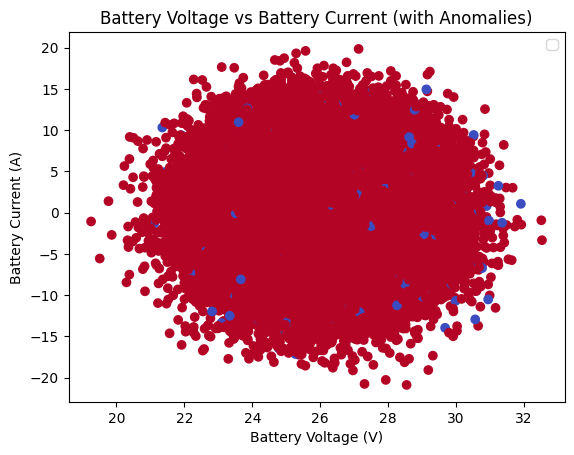

In [46]:
import matplotlib.pyplot as plt

# Plot a couple of features to visually inspect anomalies
plt.scatter(df['Battery Voltage (V)'], df['Battery Current (A)'], c=df['Anomaly'], cmap='coolwarm', marker='o')
plt.xlabel('Battery Voltage (V)')
plt.ylabel('Battery Current (A)')
plt.legend()

plt.title('Battery Voltage vs Battery Current (with Anomalies)')
plt.show()


In [42]:
# Descriptive statistics for anomalies
anomalies_stats = df[df['Anomaly'] == -1].describe()
normal_stats = df[df['Anomaly'] == 1].describe()

print("Anomalies Statistics:\n", anomalies_stats)
print("Normal Data Statistics:\n", normal_stats)


Anomalies Statistics:
                         Timestamp  Battery Voltage (V)  Battery Current (A)  \
count                        1000          1000.000000          1000.000000   
mean   2025-02-23 19:50:26.880000            26.199554            -0.689328   
min           2025-02-21 00:07:00            21.117816           -17.132768   
25%           2025-02-22 08:58:00            24.779763            -5.072426   
50%           2025-02-23 19:34:30            26.165667            -0.787087   
75%           2025-02-25 05:54:30            27.571993             3.753558   
max           2025-02-26 18:32:00            31.903849            15.113920   
std                           NaN             1.889430             6.009596   

       State of Charge (%)  Solar Panel Voltage (V)  Solar Panel Current (A)  \
count          1000.000000              1000.000000              1000.000000   
mean             57.199002                40.682721                 2.482791   
min              20.02666

In [43]:
anomalies_stats

,Timestamp,Battery Voltage (V),Battery Current (A),State of Charge (%),Solar Panel Voltage (V),Solar Panel Current (A),Solar Panel Efficiency (%),Power Consumption (W),Internal Temperature (C),Battery Temperature (C),...,Redundant Sensor Discrepancies (0/1),Thruster Malfunctions (0/1),Thruster Efficiency (%),Satellite Orientation (°),Data Throughput (Mbps),Power System Anomalies (0/1),Thermal System Anomalies (0/1),AOCS Faults (0/1),Payload Failures (0/1),Anomaly
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,2025-02-23 19:50:26.880000,26.199554,-0.689328,57.199002,40.682721,2.482791,86.675146,307.555915,24.795004,30.774823,...,0.281000,0.085000,89.848496,175.614387,50.747293,0.144000,0.207000,0.040000,0.075000,-1.0
min,2025-02-21 00:07:00,21.117816,-17.132768,20.026667,22.476205,-2.534460,75.008271,100.116308,6.018006,13.489317,...,0.000000,0.000000,80.006081,0.038477,5.106358,0.000000,0.000000,0.000000,0.000000,-1.0
25%,2025-02-22 08:58:00,24.779763,-5.072426,34.138274,36.219013,1.663326,80.064590,186.455863,20.813653,26.583001,...,0.000000,0.000000,84.117050,70.323859,21.925485,0.000000,0.000000,0.000000,0.000000,-1.0
50%,2025-02-23 19:34:30,26.165667,-0.787087,55.066629,40.830291,2.510225,86.718567,320.081491,24.552048,30.690926,...,0.000000,0.000000,89.552236,174.614306,49.120383,0.000000,0.000000,0.000000,0.000000,-1.0
75%,2025-02-25 05:54:30,27.571993,3.753558,79.362169,45.266622,3.262225,93.712554,425.343061,28.626851,35.466433,...,1.000000,0.000000,95.777865,279.701367,78.865880,0.000000,0.000000,0.000000,0.000000,-1.0
max,2025-02-26 18:32:00,31.903849,15.113920,99.987219,55.297542,5.994811,97.972705,499.153057,41.030607,48.695409,...,1.000000,1.000000,99.999814,359.671508,99.990781,1.000000,1.000000,1.000000,1.000000,-1.0
std,NaN,1.889430,6.009596,24.864477,5.941730,1.146763,7.334502,126.421761,5.805907,6.245397,...,0.449712,0.279021,6.258515,112.183814,29.701516,0.351265,0.405358,0.196057,0.263523,0.0


C:\Users\mades\AppData\Local\Temp\ipykernel_22328\3505996568.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Anomaly'] == -1]['Battery Voltage (V)'], shade=True, label='Anomalies')
C:\Users\mades\AppData\Local\Temp\ipykernel_22328\3505996568.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Anomaly'] == 1]['Battery Voltage (V)'], shade=True, label='Normal')


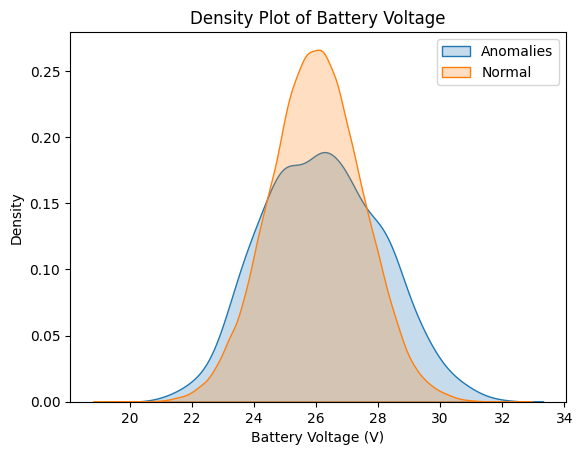

In [44]:
import seaborn as sns

# Kernel Density Estimation plot
sns.kdeplot(df[df['Anomaly'] == -1]['Battery Voltage (V)'], shade=True, label='Anomalies')
sns.kdeplot(df[df['Anomaly'] == 1]['Battery Voltage (V)'], shade=True, label='Normal')
plt.xlabel('Battery Voltage (V)')
plt.title('Density Plot of Battery Voltage')
plt.legend()
plt.show()


C:\Users\mades\AppData\Local\Temp\ipykernel_22328\134016670.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Anomaly'] == -1]['Battery Current (A)'], shade=True, label='Anomalies')
C:\Users\mades\AppData\Local\Temp\ipykernel_22328\134016670.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Anomaly'] == 1]['Battery Current (A)'], shade=True, label='Normal')


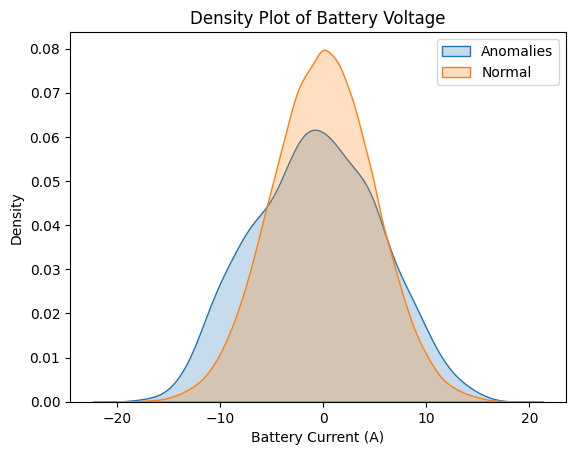

In [45]:
import seaborn as sns

# Kernel Density Estimation plot
sns.kdeplot(df[df['Anomaly'] == -1]['Battery Current (A)'], shade=True, label='Anomalies')
sns.kdeplot(df[df['Anomaly'] == 1]['Battery Current (A)'], shade=True, label='Normal')
plt.xlabel('Battery Current (A)')
plt.title('Density Plot of Battery Voltage')
plt.legend()
plt.show()


In [48]:
from sklearn.neighbors import LocalOutlierFactor

# Initialize the Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)

# Fit the model and predict anomalies
df['Anomaly_LOF'] = lof.fit_predict(x)

# -1 indicates anomalies, 1 indicates normal points
anomalies_lof = df[df['Anomaly_LOF'] == -1]
print(anomalies_lof)


                Timestamp  Battery Voltage (V)  Battery Current (A)  \
44    2025-02-21 00:03:00            26.026846            -7.241928   
57    2025-02-21 00:04:00            24.508825             8.511510   
106   2025-02-21 00:08:00            24.614755             8.605892   
469   2025-02-21 00:39:00            25.167732             0.987343   
904   2025-02-21 01:15:00            26.851172             5.143821   
...                   ...                  ...                  ...   
99277 2025-02-26 17:53:00            26.169758             3.238029   
99328 2025-02-26 17:57:00            26.718088            -5.720641   
99487 2025-02-26 18:10:00            26.516125             0.989777   
99587 2025-02-26 18:18:00            26.931533             2.007343   
99666 2025-02-26 18:25:00            24.640749            10.699935   

       State of Charge (%)  Solar Panel Voltage (V)  Solar Panel Current (A)  \
44               61.528270                41.446687                

In [49]:
df

,Timestamp,Battery Voltage (V),Battery Current (A),State of Charge (%),Solar Panel Voltage (V),Solar Panel Current (A),Solar Panel Efficiency (%),Power Consumption (W),Internal Temperature (C),Battery Temperature (C),...,Thruster Malfunctions (0/1),Thruster Efficiency (%),Satellite Orientation (°),Data Throughput (Mbps),Power System Anomalies (0/1),Thermal System Anomalies (0/1),AOCS Faults (0/1),Payload Failures (0/1),Anomaly,Anomaly_LOF
0,2025-02-21 00:00:00,27.663657,1.198668,49.747676,34.450280,1.538837,78.858183,287.625076,27.425388,29.336524,...,0,95.550449,85.803526,72.383849,0,0,0,0,1,1
1,2025-02-21 00:00:00,23.690421,5.256486,60.799818,43.339668,2.876521,93.968375,421.761029,26.474492,25.216930,...,0,99.384409,277.466628,19.009831,0,0,0,0,1,1
2,2025-02-21 00:00:00,27.683408,1.148736,34.159514,39.441033,3.175850,83.388523,472.742796,23.836097,21.506227,...,0,93.026799,348.796261,81.056144,0,0,0,0,1,1
3,2025-02-21 00:00:00,24.693368,-1.915186,63.793816,49.520640,2.512940,95.186233,393.258005,21.737029,27.930695,...,0,97.763768,107.071250,91.198533,0,0,0,0,1,1
4,2025-02-21 00:00:00,26.866385,10.069036,60.840302,38.947523,2.261755,95.496608,480.209425,20.981227,21.729351,...,0,93.447386,160.991069,52.074967,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2025-02-26 18:52:00,24.918752,-0.803144,52.951558,41.553782,3.510285,89.696518,173.477333,26.111055,28.657352,...,0,89.712973,82.567854,54.518194,0,0,0,0,1,1
99996,2025-02-26 18:53:00,25.480349,-2.227133,30.194564,40.195035,1.636767,97.769038,155.472934,24.425567,33.432067,...,0,81.622488,99.944938,15.539072,0,0,0,0,1,1
99997,2025-02-26 18:53:00,25.580797,-7.360854,69.631371,46.276700,1.892074,86.419607,471.957286,27.595192,21.751422,...,0,94.950784,158.219524,13.588880,0,0,0,0,1,1
99998,2025-02-26 18:53:00,26.127245,-1.561563,36.314000,48.322525,0.413896,82.278208,331.697548,29.569326,29.414988,...,0,98.475454,332.004822,83.425422,0,0,0,0,1,1


In [50]:
df['Anomaly_LOF'].value_counts()

Anomaly_LOF
 1    99000
-1     1000
Name: count, dtype: int64

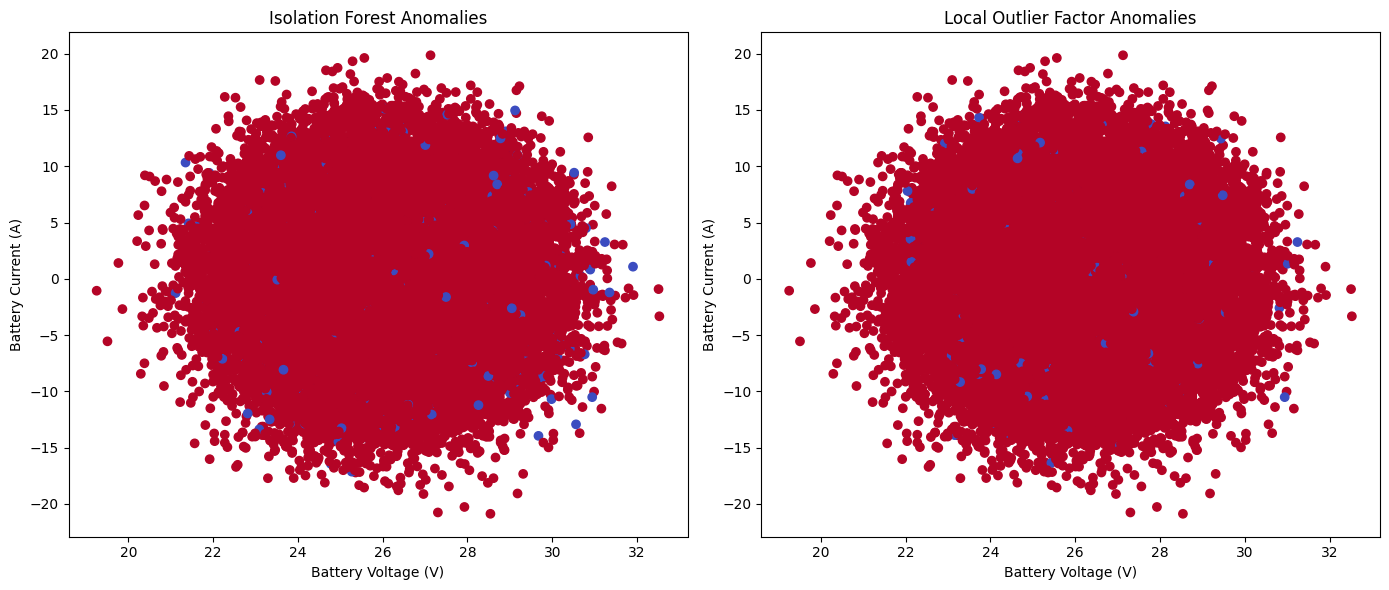

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Battery Voltage vs. Battery Current for both models
plt.figure(figsize=(14, 6))

# Isolation Forest
plt.subplot(1, 2, 1)
plt.scatter(df['Battery Voltage (V)'], df['Battery Current (A)'], c=df['Anomaly'], cmap='coolwarm', marker='o')
plt.title('Isolation Forest Anomalies')
plt.xlabel('Battery Voltage (V)')
plt.ylabel('Battery Current (A)')

# Local Outlier Factor
plt.subplot(1, 2, 2)
plt.scatter(df['Battery Voltage (V)'], df['Battery Current (A)'], c=df['Anomaly_LOF'], cmap='coolwarm', marker='o')
plt.title('Local Outlier Factor Anomalies')
plt.xlabel('Battery Voltage (V)')
plt.ylabel('Battery Current (A)')

plt.tight_layout()
plt.show()


In [53]:
df['Combined_Anomaly'] = df.apply(lambda row: -1 if row['Anomaly'] == -1 or row['Anomaly_LOF'] == -1 else 1, axis=1)

# Analyze combined anomalies
combined_anomalies = df[df['Combined_Anomaly'] == -1]
print(combined_anomalies)

                Timestamp  Battery Voltage (V)  Battery Current (A)  \
44    2025-02-21 00:03:00            26.026846            -7.241928   
57    2025-02-21 00:04:00            24.508825             8.511510   
94    2025-02-21 00:07:00            24.255969             9.973476   
99    2025-02-21 00:08:00            23.773161           -12.145513   
106   2025-02-21 00:08:00            24.614755             8.605892   
...                   ...                  ...                  ...   
99389 2025-02-26 18:02:00            27.083067             2.206168   
99487 2025-02-26 18:10:00            26.516125             0.989777   
99587 2025-02-26 18:18:00            26.931533             2.007343   
99666 2025-02-26 18:25:00            24.640749            10.699935   
99749 2025-02-26 18:32:00            27.494083            -1.618184   

       State of Charge (%)  Solar Panel Voltage (V)  Solar Panel Current (A)  \
44               61.528270                41.446687                

In [56]:
df['Combined_Anomaly'].value_counts()

Combined_Anomaly
 1    98038
-1     1962
Name: count, dtype: int64

Text(0, 0.5, 'Battery Current (A)')

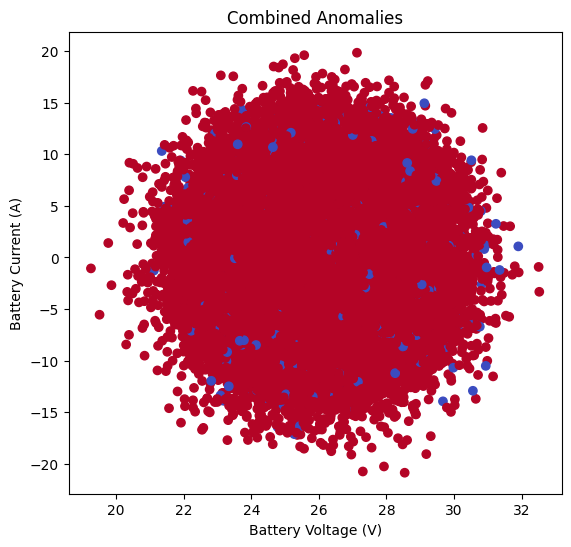

In [57]:
plt.figure(figsize=(14, 6))

# Isolation Forest
plt.subplot(1, 2, 1)
plt.scatter(df['Battery Voltage (V)'], df['Battery Current (A)'], c=df['Combined_Anomaly'], cmap='coolwarm', marker='o')
plt.title('Combined Anomalies')
plt.xlabel('Battery Voltage (V)')
plt.ylabel('Battery Current (A)')

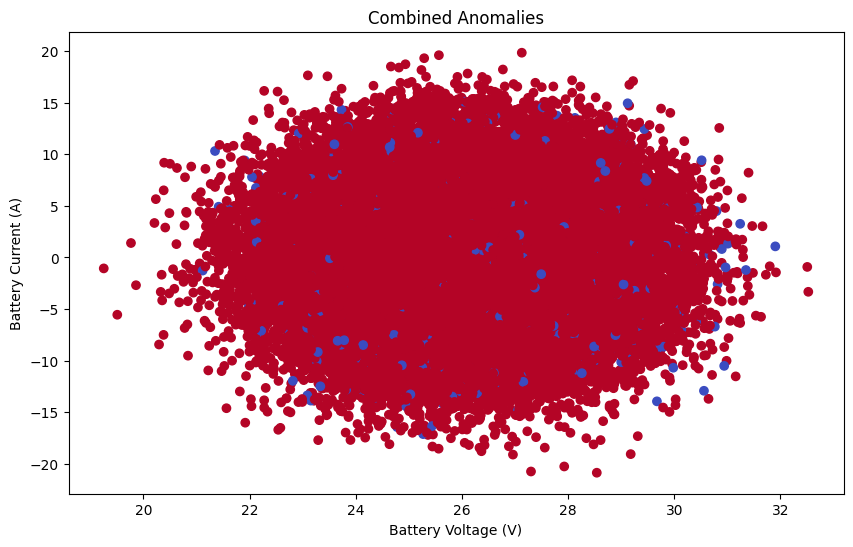

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Battery Voltage (V)'], df['Battery Current (A)'], c=df['Combined_Anomaly'], cmap='coolwarm', marker='o')
plt.title('Combined Anomalies')
plt.xlabel('Battery Voltage (V)')
plt.ylabel('Battery Current (A)')
plt.show()

In [59]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# y = scaler.fit_transform(df[features])

In [60]:
# y

array([[ 1.10980429,  0.24558283, -0.44668243, ..., -0.1441636 ,
        -0.0981941 , -0.09927838],
       [-1.54600619,  1.05703481,  0.03181656, ..., -0.1441636 ,
        -0.0981941 , -0.09927838],
       [ 1.12300667,  0.23559778, -1.12156696, ..., -0.1441636 ,
        -0.0981941 , -0.09927838],
       ...,
       [-0.28243121, -1.46608628,  0.41417585, ..., -0.1441636 ,
        -0.0981941 , -0.09927838],
       [ 0.08282785, -0.30638749, -1.02828918, ..., -0.1441636 ,
        -0.0981941 , -0.09927838],
       [ 0.15374236,  1.02604959,  0.37627607, ..., -0.1441636 ,
        -0.0981941 , -0.09927838]])

## Using the StandardScaler

In [62]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv(r"C:\Users\mades\Downloads\satellite dataset\Original dataset\satellite_telemetry_data.csv")
df

,Timestamp,Battery Voltage (V),Battery Current (A),State of Charge (%),Solar Panel Voltage (V),Solar Panel Current (A),Solar Panel Efficiency (%),Power Consumption (W),Internal Temperature (C),Battery Temperature (C),...,Bit Error Rate,Redundant Sensor Discrepancies (0/1),Thruster Malfunctions (0/1),Thruster Efficiency (%),Satellite Orientation (°),Data Throughput (Mbps),Power System Anomalies (0/1),Thermal System Anomalies (0/1),AOCS Faults (0/1),Payload Failures (0/1)
0,21-02-2025 00:00,27.663657,1.198668,49.747676,34.450280,1.538837,78.858183,287.625076,27.425388,29.336524,...,0.002098,0,0,95.550449,85.803526,72.383849,0,0,0,0
1,21-02-2025 00:00,23.690421,5.256486,60.799818,43.339668,2.876521,93.968375,421.761029,26.474492,25.216930,...,0.009207,0,0,99.384409,277.466628,19.009831,0,0,0,0
2,21-02-2025 00:00,27.683408,1.148736,34.159514,39.441033,3.175850,83.388523,472.742796,23.836097,21.506227,...,0.001557,0,0,93.026799,348.796261,81.056144,0,0,0,0
3,21-02-2025 00:00,24.693368,-1.915186,63.793816,49.520640,2.512940,95.186233,393.258005,21.737029,27.930695,...,0.008302,0,0,97.763768,107.071250,91.198533,0,0,0,0
4,21-02-2025 00:00,26.866385,10.069036,60.840302,38.947523,2.261755,95.496608,480.209425,20.981227,21.729351,...,0.003185,0,0,93.447386,160.991069,52.074967,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,26-02-2025 18:52,24.918752,-0.803144,52.951558,41.553782,3.510285,89.696518,173.477333,26.111055,28.657352,...,0.001415,0,0,89.712973,82.567854,54.518194,0,0,0,0
99996,26-02-2025 18:53,25.480349,-2.227133,30.194564,40.195035,1.636767,97.769038,155.472934,24.425567,33.432067,...,0.000842,0,0,81.622488,99.944938,15.539072,0,0,0,0
99997,26-02-2025 18:53,25.580797,-7.360854,69.631371,46.276700,1.892074,86.419607,471.957286,27.595192,21.751422,...,0.002103,0,0,94.950784,158.219524,13.588880,0,0,0,0
99998,26-02-2025 18:53,26.127245,-1.561563,36.314000,48.322525,0.413896,82.278208,331.697548,29.569326,29.414988,...,0.009265,1,0,98.475454,332.004822,83.425422,0,0,0,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Timestamp                             100000 non-null  object 
 1   Battery Voltage (V)                   100000 non-null  float64
 2   Battery Current (A)                   100000 non-null  float64
 3   State of Charge (%)                   100000 non-null  float64
 4   Solar Panel Voltage (V)               100000 non-null  float64
 5   Solar Panel Current (A)               100000 non-null  float64
 6   Solar Panel Efficiency (%)            100000 non-null  float64
 7   Power Consumption (W)                 100000 non-null  float64
 8   Internal Temperature (C)              100000 non-null  float64
 9   Battery Temperature (C)               100000 non-null  float64
 10  Solar Panel Temperature (C)           100000 non-null  float64
 11  R

In [65]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
lb = LabelEncoder()
df['Spectral Sensor Health'] = lb.fit_transform(df['Spectral Sensor Health'])

C:\Users\mades\AppData\Local\Temp\ipykernel_22328\4074156440.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [74]:
# x = df.drop(['Timestamp'], axis=1)

columns_to_scale = [
    'Battery Voltage (V)', 'Battery Current (A)', 'State of Charge (%)',
    'Solar Panel Voltage (V)', 'Solar Panel Current (A)', 'Solar Panel Efficiency (%)',
    'Power Consumption (W)', 'Internal Temperature (C)', 'Battery Temperature (C)',
    'Solar Panel Temperature (C)', 'Radiator Temperature (C)', 'Radiator Efficiency (%)',
    'Thermal Gradient', 'Satellite Position (km)', 'Satellite Velocity (km/s)',
    'Gyroscope Readings (rad/s)', 'Magnetometer Wheel Speed (RPM)', 'Reaction Wheel Speed (RPM)',
    'Thruster Firing Status (1/0)', 'Signal Strength (dB)', 'Data Transmission Rate (Mbps)',
    'Packet Loss (%)', 'Payload Power Consumption (W)', 'Sensor Data Rate (Mbps)',
    'Camera/Image Sensor Temp (C)', 'Payload Data Quality', 'Latency (ms)', 'Bit Error Rate',
    'Redundant Sensor Discrepancies (0/1)', 'Thruster Malfunctions (0/1)', 'Thruster Efficiency (%)',
    'Satellite Orientation (°)', 'Data Throughput (Mbps)', 'Power System Anomalies (0/1)',
    'Thermal System Anomalies (0/1)', 'AOCS Faults (0/1)', 'Payload Failures (0/1)'
]

scaler = StandardScaler()

# Fit and transform the data
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [76]:
df[columns_to_scale]

,Battery Voltage (V),Battery Current (A),State of Charge (%),Solar Panel Voltage (V),Solar Panel Current (A),Solar Panel Efficiency (%),Power Consumption (W),Internal Temperature (C),Battery Temperature (C),Solar Panel Temperature (C),...,Bit Error Rate,Redundant Sensor Discrepancies (0/1),Thruster Malfunctions (0/1),Thruster Efficiency (%),Satellite Orientation (°),Data Throughput (Mbps),Power System Anomalies (0/1),Thermal System Anomalies (0/1),AOCS Faults (0/1),Payload Failures (0/1)
0,1.109804,0.245583,-0.446682,-1.107727,-0.963643,-1.153530,-0.112259,0.484192,-0.129802,-0.871331,...,-0.998372,-0.142053,-0.101313,0.955647,-0.907729,0.724944,-0.143003,-0.144164,-0.098194,-0.099278
1,-1.546006,1.057035,0.031817,0.666969,0.375777,1.126322,1.048623,0.293668,-0.956832,-1.093975,...,1.458517,-0.142053,-0.101313,1.619174,0.939278,-1.222927,-0.143003,-0.144164,-0.098194,-0.099278
2,1.123007,0.235598,-1.121567,-0.111363,0.675494,-0.469984,1.489845,-0.234969,-1.701776,-1.728168,...,-1.185280,-0.142053,-0.101313,0.518889,1.626663,1.041437,-0.143003,-0.144164,-0.098194,-0.099278
3,-0.875612,-0.377102,0.161441,1.900950,0.011724,1.310074,0.801943,-0.655545,-0.412029,0.481326,...,1.145851,-0.142053,-0.101313,1.338696,-0.702778,1.411581,-0.143003,-0.144164,-0.098194,-0.099278
4,0.576888,2.019412,0.033569,-0.209888,-0.239787,1.356904,1.554465,-0.806980,-1.656982,-1.091889,...,-0.622725,-0.142053,-0.101313,0.591679,-0.183167,-0.016223,-0.143003,-0.144164,-0.098194,-0.099278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.724959,-0.154724,-0.307971,0.310431,1.010363,0.481777,-1.100152,0.220848,-0.266149,-0.318551,...,-1.234484,-0.142053,-0.101313,-0.054620,-0.938911,0.072942,-0.143003,-0.144164,-0.098194,-0.099278
99996,-0.349574,-0.439483,-1.293228,0.039168,-0.865586,1.699773,-1.255972,-0.116861,0.692400,-0.961860,...,-1.432592,-0.142053,-0.101313,-1.454806,-0.771452,-1.349591,-0.143003,-0.144164,-0.098194,-0.099278
99997,-0.282431,-1.466086,0.414176,1.253324,-0.609947,-0.012649,1.483047,0.518215,-1.652551,1.183833,...,-0.996750,-0.142053,-0.101313,0.851865,-0.209875,-1.420763,-0.143003,-0.144164,-0.098194,-0.099278
99998,0.082828,-0.306387,-1.028289,1.661756,-2.090044,-0.637511,0.269167,0.913759,-0.114050,-0.426612,...,1.478684,7.039611,-0.101313,1.461865,1.464848,1.127904,-0.143003,-0.144164,-0.098194,-0.099278


In [69]:
# sc = StandardScaler()
# x = sc.fit_transform(x)

In [70]:
iso_forest = IsolationForest(contamination=0.01, n_estimators=100, random_state=42, max_samples='auto')
lof = LocalOutlierFactor(n_neighbors=20,contamination=0.01)


In [73]:
# x

array([[ 1.10980429,  0.24558283, -0.44668243, ..., -0.1441636 ,
        -0.0981941 , -0.09927838],
       [-1.54600619,  1.05703481,  0.03181656, ..., -0.1441636 ,
        -0.0981941 , -0.09927838],
       [ 1.12300667,  0.23559778, -1.12156696, ..., -0.1441636 ,
        -0.0981941 , -0.09927838],
       ...,
       [-0.28243121, -1.46608628,  0.41417585, ..., -0.1441636 ,
        -0.0981941 , -0.09927838],
       [ 0.08282785, -0.30638749, -1.02828918, ..., -0.1441636 ,
        -0.0981941 , -0.09927838],
       [ 0.15374236,  1.02604959,  0.37627607, ..., -0.1441636 ,
        -0.0981941 , -0.09927838]])

In [77]:
iso_forest.fit(df[columns_to_scale])
df['Anomaly_IF'] = iso_forest.predict(df[columns_to_scale])
df['Anomaly_LOF'] = lof.fit_predict(df[columns_to_scale])

In [78]:
df

,Timestamp,Battery Voltage (V),Battery Current (A),State of Charge (%),Solar Panel Voltage (V),Solar Panel Current (A),Solar Panel Efficiency (%),Power Consumption (W),Internal Temperature (C),Battery Temperature (C),...,Thruster Malfunctions (0/1),Thruster Efficiency (%),Satellite Orientation (°),Data Throughput (Mbps),Power System Anomalies (0/1),Thermal System Anomalies (0/1),AOCS Faults (0/1),Payload Failures (0/1),Anomaly_IF,Anomaly_LOF
0,2025-02-21 00:00:00,1.109804,0.245583,-0.446682,-1.107727,-0.963643,-1.153530,-0.112259,0.484192,-0.129802,...,-0.101313,0.955647,-0.907729,0.724944,-0.143003,-0.144164,-0.098194,-0.099278,1,1
1,2025-02-21 00:00:00,-1.546006,1.057035,0.031817,0.666969,0.375777,1.126322,1.048623,0.293668,-0.956832,...,-0.101313,1.619174,0.939278,-1.222927,-0.143003,-0.144164,-0.098194,-0.099278,1,1
2,2025-02-21 00:00:00,1.123007,0.235598,-1.121567,-0.111363,0.675494,-0.469984,1.489845,-0.234969,-1.701776,...,-0.101313,0.518889,1.626663,1.041437,-0.143003,-0.144164,-0.098194,-0.099278,1,1
3,2025-02-21 00:00:00,-0.875612,-0.377102,0.161441,1.900950,0.011724,1.310074,0.801943,-0.655545,-0.412029,...,-0.101313,1.338696,-0.702778,1.411581,-0.143003,-0.144164,-0.098194,-0.099278,1,1
4,2025-02-21 00:00:00,0.576888,2.019412,0.033569,-0.209888,-0.239787,1.356904,1.554465,-0.806980,-1.656982,...,-0.101313,0.591679,-0.183167,-0.016223,-0.143003,-0.144164,-0.098194,-0.099278,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2025-02-26 18:52:00,-0.724959,-0.154724,-0.307971,0.310431,1.010363,0.481777,-1.100152,0.220848,-0.266149,...,-0.101313,-0.054620,-0.938911,0.072942,-0.143003,-0.144164,-0.098194,-0.099278,1,1
99996,2025-02-26 18:53:00,-0.349574,-0.439483,-1.293228,0.039168,-0.865586,1.699773,-1.255972,-0.116861,0.692400,...,-0.101313,-1.454806,-0.771452,-1.349591,-0.143003,-0.144164,-0.098194,-0.099278,1,1
99997,2025-02-26 18:53:00,-0.282431,-1.466086,0.414176,1.253324,-0.609947,-0.012649,1.483047,0.518215,-1.652551,...,-0.101313,0.851865,-0.209875,-1.420763,-0.143003,-0.144164,-0.098194,-0.099278,1,1
99998,2025-02-26 18:53:00,0.082828,-0.306387,-1.028289,1.661756,-2.090044,-0.637511,0.269167,0.913759,-0.114050,...,-0.101313,1.461865,1.464848,1.127904,-0.143003,-0.144164,-0.098194,-0.099278,1,1


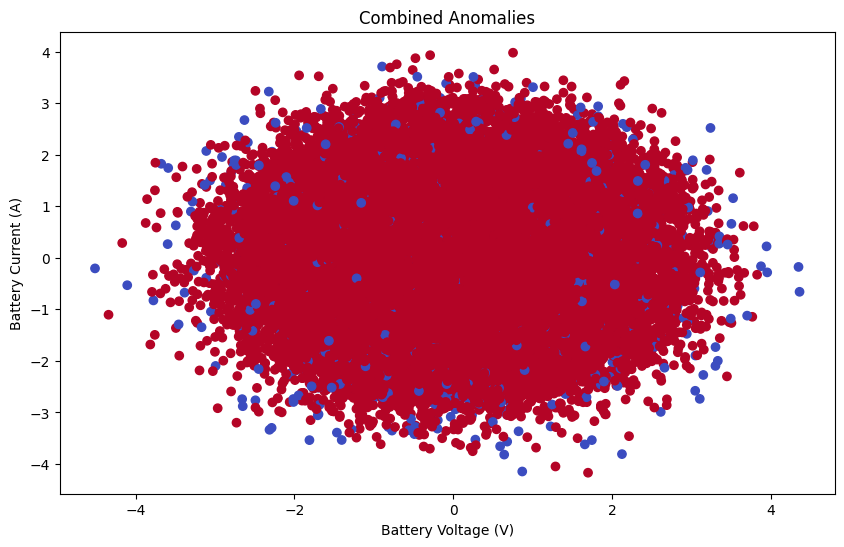

                Timestamp  Battery Voltage (V)  Battery Current (A)  \
87    2025-02-21 00:07:00            -0.183641             0.364827   
94    2025-02-21 00:07:00            -1.167980             2.000303   
183   2025-02-21 00:15:00             0.400489             2.008892   
192   2025-02-21 00:16:00            -0.520433            -0.280648   
220   2025-02-21 00:18:00            -0.186762            -1.188595   
...                   ...                  ...                  ...   
99413 2025-02-26 18:04:00             1.000283             0.973654   
99443 2025-02-26 18:06:00             0.245798             0.644296   
99503 2025-02-26 18:11:00            -0.058927             0.483909   
99857 2025-02-26 18:41:00            -2.447448             1.792403   
99953 2025-02-26 18:49:00            -1.159353             1.065216   

       State of Charge (%)  Solar Panel Voltage (V)  Solar Panel Current (A)  \
87                1.582505                 1.929977                

In [83]:
df['Combined_Anomaly'] = df.apply(lambda row: -1 if row['Anomaly_IF'] == -1 or row['Anomaly_LOF'] == -1 else 1, axis=1)

# Visualize combined anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df['Battery Voltage (V)'], df['Battery Current (A)'], c=df['Combined_Anomaly'], cmap='coolwarm', marker='o')
plt.title('Combined Anomalies')
plt.xlabel('Battery Voltage (V)')
plt.ylabel('Battery Current (A)')
plt.show()

# Display detected anomalies
combined_anomalies = df[df['Combined_Anomaly'] == -1]
print(combined_anomalies)

In [84]:
# import seaborn as sns
# sns.countplot(df['Anomaly_IF'])

In [88]:
# plt.bar(df['Anomaly_IF'], df['Anomaly_LOF'])

In [89]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Generate sample data
num_samples = 1000
data = {
    'Timestamp': pd.date_range(start='2025-02-21', periods=num_samples, freq='H'),
    'Battery Voltage (V)': np.random.uniform(20, 30, num_samples),
    'Battery Current (A)': np.random.uniform(-10, 10, num_samples),
    'State of Charge (%)': np.random.uniform(20, 100, num_samples),
    'Solar Panel Voltage (V)': np.random.uniform(20, 50, num_samples),
    'Solar Panel Current (A)': np.random.uniform(-5, 5, num_samples),
    'Solar Panel Efficiency (%)': np.random.uniform(70, 100, num_samples),
    'Power Consumption (W)': np.random.uniform(100, 500, num_samples),
    'Internal Temperature (C)': np.random.uniform(10, 40, num_samples),
    'Battery Temperature (C)': np.random.uniform(10, 40, num_samples),
    'Solar Panel Temperature (C)': np.random.uniform(10, 50, num_samples),
    'Radiator Temperature (C)': np.random.uniform(10, 50, num_samples),
    'Radiator Efficiency (%)': np.random.uniform(70, 100, num_samples),
    'Thermal Gradient': np.random.uniform(0, 5, num_samples),
    'Satellite Position (km)': np.random.uniform(500, 1000, num_samples),
    'Satellite Velocity (km/s)': np.random.uniform(0, 10, num_samples),
    'Gyroscope Readings (rad/s)': np.random.uniform(0, 1, num_samples),
    'Magnetometer Wheel Speed (RPM)': np.random.uniform(0, 1000, num_samples),
    'Reaction Wheel Speed (RPM)': np.random.uniform(0, 1000, num_samples),
    'Thruster Firing Status (1/0)': np.random.randint(0, 2, num_samples),
    'Signal Strength (dB)': np.random.uniform(-100, 0, num_samples),
    'Data Transmission Rate (Mbps)': np.random.uniform(0, 100, num_samples),
    'Packet Loss (%)': np.random.uniform(0, 10, num_samples),
    'Payload Power Consumption (W)': np.random.uniform(100, 500, num_samples),
    'Sensor Data Rate (Mbps)': np.random.uniform(0, 100, num_samples),
    'Camera/Image Sensor Temp (C)': np.random.uniform(10, 50, num_samples),
    'Spectral Sensor Health Encoded': np.random.randint(0, 2, num_samples),
    'Payload Data Quality': np.random.uniform(0, 100, num_samples),
    'Error Flags (0/1)': np.random.randint(0, 2, num_samples),
    'Latency (ms)': np.random.uniform(0, 100, num_samples),
    'Bit Error Rate': np.random.uniform(0, 0.01, num_samples),
    'Redundant Sensor Discrepancies (0/1)': np.random.randint(0, 2, num_samples),
    'Thruster Malfunctions (0/1)': np.random.randint(0, 2, num_samples),
    'Thruster Efficiency (%)': np.random.uniform(70, 100, num_samples),
    'Satellite Orientation (°)': np.random.uniform(0, 360, num_samples),
    'Data Throughput (Mbps)': np.random.uniform(0, 100, num_samples),
    'Power System Anomalies (0/1)': np.random.randint(0, 2, num_samples),
    'Thermal System Anomalies (0/1)': np.random.randint(0, 2, num_samples),
    'AOCS Faults (0/1)': np.random.randint(0, 2, num_samples),
    'Payload Failures (0/1)': np.random.randint(0, 2, num_samples)
}

# Create a DataFrame
df_sample = pd.DataFrame(data)

# Display the first few rows of the sample dataset
print(df_sample.head())


            Timestamp  Battery Voltage (V)  Battery Current (A)  \
0 2025-02-21 00:00:00            23.745401            -6.297341   
1 2025-02-21 01:00:00            29.507143             0.838019   
2 2025-02-21 02:00:00            27.319939             7.458917   
3 2025-02-21 03:00:00            25.986585             4.644498   
4 2025-02-21 04:00:00            21.560186             6.131223   

   State of Charge (%)  Solar Panel Voltage (V)  Solar Panel Current (A)  \
0            40.936455                40.181090                 0.719959   
1            39.758304                43.900442                 3.054323   
2            92.500366                27.514037                 2.601609   
3            39.963696                38.746223                -3.461001   
4            41.755978                37.152379                -3.507505   

   Solar Panel Efficiency (%)  Power Consumption (W)  \
0                   81.809066             359.302782   
1                   84.20307

C:\Users\mades\AppData\Local\Temp\ipykernel_22328\1273813234.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'Timestamp': pd.date_range(start='2025-02-21', periods=num_samples, freq='H'),


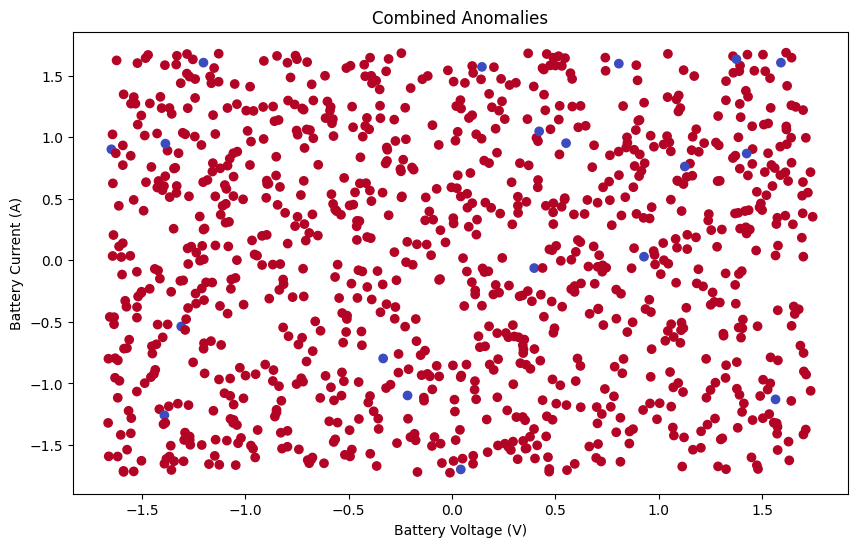

              Timestamp  Battery Voltage (V)  Battery Current (A)  \
97  2025-02-25 01:00:00            -0.214786            -1.097709   
99  2025-02-25 03:00:00            -1.309509            -0.537221   
196 2025-03-01 04:00:00             0.807213             1.597266   
204 2025-03-01 12:00:00             0.397863            -0.062916   
205 2025-03-01 13:00:00            -1.647513             0.901886   
227 2025-03-02 11:00:00            -0.332746            -0.797148   
228 2025-03-02 12:00:00             1.376034             1.633181   
324 2025-03-06 12:00:00             1.591173             1.605403   
431 2025-03-10 23:00:00             0.928980             0.029375   
434 2025-03-11 02:00:00            -1.390965            -1.257914   
445 2025-03-11 13:00:00             1.565088            -1.129514   
510 2025-03-14 06:00:00             0.421789             1.047680   
700 2025-03-22 04:00:00             0.144980             1.571014   
743 2025-03-23 23:00:00           

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the columns to be scaled
columns_to_scale = [
    'Battery Voltage (V)', 'Battery Current (A)', 'State of Charge (%)',
    'Solar Panel Voltage (V)', 'Solar Panel Current (A)', 'Solar Panel Efficiency (%)',
    'Power Consumption (W)', 'Internal Temperature (C)', 'Battery Temperature (C)',
    'Solar Panel Temperature (C)', 'Radiator Temperature (C)', 'Radiator Efficiency (%)',
    'Thermal Gradient', 'Satellite Position (km)', 'Satellite Velocity (km/s)',
    'Gyroscope Readings (rad/s)', 'Magnetometer Wheel Speed (RPM)', 'Reaction Wheel Speed (RPM)',
    'Thruster Firing Status (1/0)', 'Signal Strength (dB)', 'Data Transmission Rate (Mbps)',
    'Packet Loss (%)', 'Payload Power Consumption (W)', 'Sensor Data Rate (Mbps)',
    'Camera/Image Sensor Temp (C)', 'Payload Data Quality', 'Latency (ms)', 'Bit Error Rate',
    'Redundant Sensor Discrepancies (0/1)', 'Thruster Malfunctions (0/1)', 'Thruster Efficiency (%)',
    'Satellite Orientation (°)', 'Data Throughput (Mbps)', 'Power System Anomalies (0/1)',
    'Thermal System Anomalies (0/1)', 'AOCS Faults (0/1)', 'Payload Failures (0/1)'
]

# Fit and transform the data
df_sample[columns_to_scale] = scaler.fit_transform(df_sample[columns_to_scale])

# Initialize models
# iso_forest = IsolationForest(contamination=0.01, random_state=42)
# lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)

# Fit models
iso_forest.fit(df_sample[columns_to_scale])
df_sample['Anomaly_IF'] = iso_forest.predict(df_sample[columns_to_scale])
df_sample['Anomaly_LOF'] = lof.fit_predict(df_sample[columns_to_scale])

# Combine results
df_sample['Combined_Anomaly'] = df_sample.apply(lambda row: -1 if row['Anomaly_IF'] == -1 or row['Anomaly_LOF'] == -1 else 1, axis=1)

# Visualize combined anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df_sample['Battery Voltage (V)'], df_sample['Battery Current (A)'], c=df_sample['Combined_Anomaly'], cmap='coolwarm', marker='o')
plt.title('Combined Anomalies')
plt.xlabel('Battery Voltage (V)')
plt.ylabel('Battery Current (A)')
plt.show()

# Display detected anomalies
combined_anomalies = df_sample[df_sample['Combined_Anomaly'] == -1]
print(combined_anomalies)


In [93]:
df_sample['Combined_Anomaly'].value_counts()

Combined_Anomaly
 1    981
-1     19
Name: count, dtype: int64

In [ ]:
import numpy as np

# Calculate Z-scores
z_scores = np.abs((df_sample - df_sample.mean()) / df_sample.std())

# Identify outliers (Z-score > 3)
outliers = df_sample[(z_scores > 3).any(axis=1)]
print("Outliers identified using Z-score method:\n", outliers)


In [ ]:
# # Calculate IQR
# Q1 = df_sample.quantile(0.25)
# Q3 = df_sample.quantile(0.75)
# IQR = Q3 - Q1

# # Identify outliers
# outliers = df_sample[((df_sample < (Q1 - 1.5 * IQR)) | (df_sample > (Q3 + 1.5 * IQR))).any(axis=1)]
# outliers

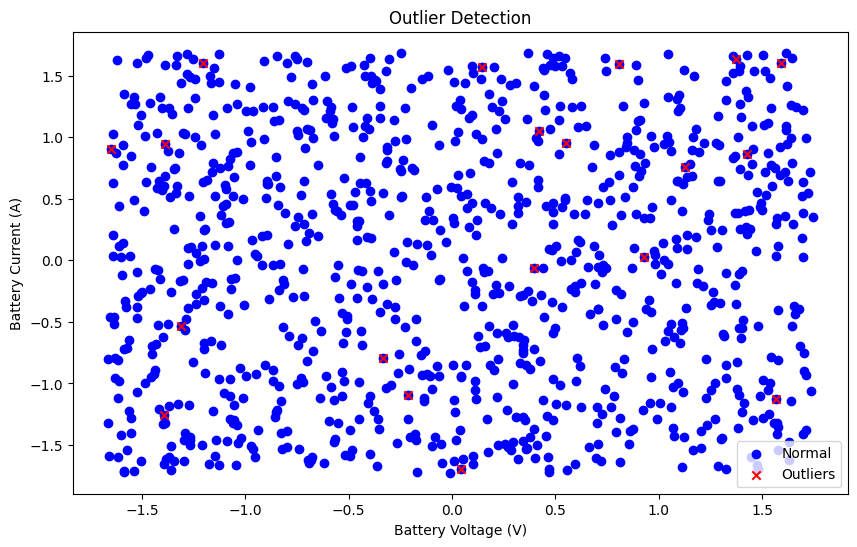

In [97]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_sample['Battery Voltage (V)'], df_sample['Battery Current (A)'], c='blue', marker='o', label='Normal')
plt.scatter(outliers['Battery Voltage (V)'], outliers['Battery Current (A)'], c='red', marker='x', label='Outliers')
plt.xlabel('Battery Voltage (V)')
plt.ylabel('Battery Current (A)')
plt.title('Outlier Detection')
plt.legend()
plt.show()


In [98]:
# Analyze feature values of anomalies
anomalies = df_sample[df_sample['Combined_Anomaly'] == -1]
anomalies_stats = anomalies.describe()

print(anomalies_stats)


                           Timestamp  Battery Voltage (V)  \
count                             19            19.000000   
mean   2025-03-13 02:53:41.052631552             0.152405   
min              2025-02-25 01:00:00            -1.647513   
25%              2025-03-02 00:00:00            -0.767392   
50%              2025-03-11 02:00:00             0.397863   
75%              2025-03-24 01:30:00             1.027599   
max              2025-04-03 05:00:00             1.591173   
std                              NaN             1.100483   

       Battery Current (A)  State of Charge (%)  Solar Panel Voltage (V)  \
count            19.000000            19.000000                19.000000   
mean              0.365199             0.192513                 0.135896   
min              -1.698328            -1.599960                -1.518336   
25%              -0.667185            -0.697419                -0.652773   
50%               0.867242             0.330266                 0.4228

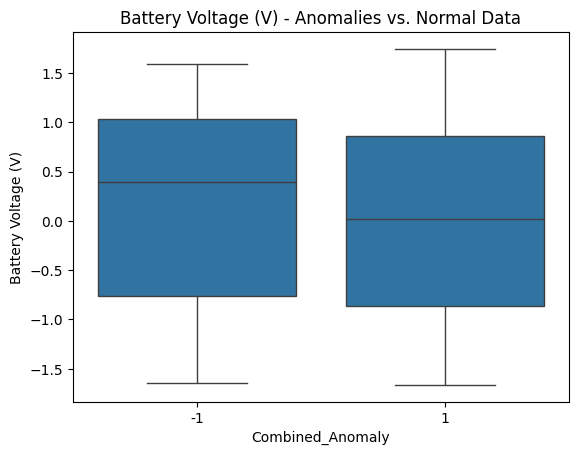

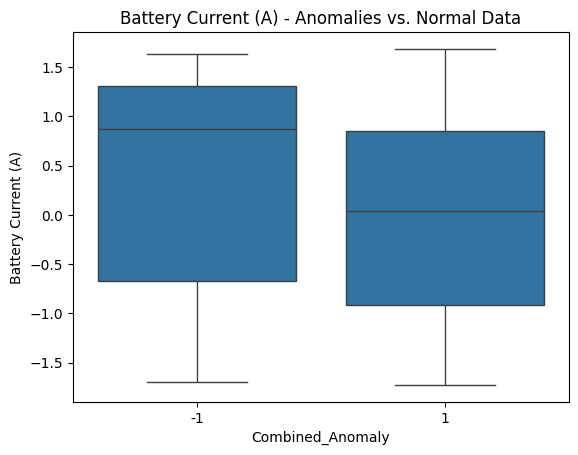

In [99]:
import seaborn as sns

# Visualize feature values of anomalies vs. normal data
sns.boxplot(data=df_sample, x='Combined_Anomaly', y='Battery Voltage (V)')
plt.title('Battery Voltage (V) - Anomalies vs. Normal Data')
plt.show()

# Repeat for other important features
sns.boxplot(data=df_sample, x='Combined_Anomaly', y='Battery Current (A)')
plt.title('Battery Current (A) - Anomalies vs. Normal Data')
plt.show()


In [101]:
# from sklearn.ensemble import IsolationForest
import joblib

# Train the Isolation Forest model
# model = IsolationForest(n_estimators=100, contamination=0.1)
# model.fit(X_train)  # X_train is your training data

# Save the model
joblib.dump(iso_forest, 'isolation_forest_model.pkl')

# Load the model



['isolation_forest_model.pkl']

In [ ]:

# Predict using the loaded model


In [ ]:
predictions = loaded_model.predict(X_test)

In [102]:
joblib.dump(lof, 'LocalOutlierFactor_model.pkl')


['LocalOutlierFactor_model.pkl']

In [103]:
!streamlit run str.py

^C


In [104]:
joblib.dump(sc, 'scaler.pkl')


['scaler.pkl']

In [95]:
outliers

,Timestamp,Battery Voltage (V),Battery Current (A),State of Charge (%),Solar Panel Voltage (V),Solar Panel Current (A),Solar Panel Efficiency (%),Power Consumption (W),Internal Temperature (C),Battery Temperature (C),...,Thruster Efficiency (%),Satellite Orientation (°),Data Throughput (Mbps),Power System Anomalies (0/1),Thermal System Anomalies (0/1),AOCS Faults (0/1),Payload Failures (0/1),Anomaly_IF,Anomaly_LOF,Combined_Anomaly
97,2025-02-25 01:00:00,-0.214786,-1.097709,0.454952,-1.356687,-1.438977,-0.816661,1.240496,-1.540565,-1.047330,...,-1.260192,1.110529,-0.901354,-1.026347,-1.068329,1.008032,-1.049209,-1,1,-1
99,2025-02-25 03:00:00,-1.309509,-0.537221,-0.366350,-0.198334,-1.626465,-1.586375,1.315967,1.430543,0.348325,...,-1.258295,-1.538342,0.715987,-1.026347,-1.068329,1.008032,-1.049209,-1,1,-1
196,2025-03-01 04:00:00,0.807213,1.597266,-0.144727,1.574129,-1.634009,0.830588,-0.862831,-1.233586,0.676398,...,1.164319,1.491829,-0.573352,0.974329,-1.068329,1.008032,0.953099,1,-1,-1
204,2025-03-01 12:00:00,0.397863,-0.062916,0.817469,0.651539,-1.346724,1.654222,-1.391248,1.585890,0.629499,...,-0.086006,1.624583,0.067799,-1.026347,0.936041,1.008032,-1.049209,1,-1,-1
205,2025-03-01 13:00:00,-1.647513,0.901886,1.430739,1.213683,-0.054468,-0.419521,1.569632,-1.049229,-0.820329,...,1.369448,1.426022,1.673799,0.974329,0.936041,1.008032,0.953099,1,-1,-1
227,2025-03-02 11:00:00,-0.332746,-0.797148,0.330266,-0.475312,0.512303,1.334989,1.701120,-1.307548,-1.278635,...,-1.706244,-1.385481,-1.132705,0.974329,-1.068329,-0.992032,-1.049209,1,-1,-1
228,2025-03-02 12:00:00,1.376034,1.633181,-0.706188,-1.344630,-0.097408,-1.199520,0.992349,1.633087,0.364542,...,-1.596297,-1.630303,1.665651,0.974329,-1.068329,1.008032,0.953099,-1,1,-1
324,2025-03-06 12:00:00,1.591173,1.605403,1.106206,1.018296,1.100825,-1.534329,-1.422137,-1.455061,-1.494172,...,-1.699447,-0.029830,0.948999,0.974329,-1.068329,-0.992032,0.953099,-1,1,-1
431,2025-03-10 23:00:00,0.928980,0.029375,1.116246,1.747201,0.184268,-1.418045,1.546918,-0.078196,0.358770,...,1.545124,-0.150392,0.791737,-1.026347,-1.068329,-0.992032,-1.049209,-1,1,-1
434,2025-03-11 02:00:00,-1.390965,-1.257914,1.578948,0.757901,-1.469897,0.337928,0.971529,-1.612952,1.683850,...,-1.731157,-0.566029,1.633948,0.974329,-1.068329,1.008032,0.953099,-1,-1,-1


### Updated

In [139]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv(r"C:\Users\mades\Downloads\satellite dataset\Original dataset\satellite_telemetry_data.csv")  

# Drop missing values and Timestamp column
df.dropna(inplace=True)
df = df.drop(['Timestamp'], axis=1)

# Convert categorical column into numerical features
df = pd.get_dummies(df, columns=["Spectral Sensor Health"], drop_first=True)

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Initialize models
iso_forest = IsolationForest(n_estimators=100, contamination=0.021, random_state=42)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.021)


# Fit Isolation Forest and predict anomalies
iso_forest.fit(scaled_data)
iso_pred = iso_forest.predict(scaled_data)  # -1 (anomaly), 1 (normal)

# Fit & predict using LOF
lof_pred = lof.fit_predict(scaled_data)  # -1 (anomaly), 1 (normal)

# Convert predictions to DataFrame
df_results = pd.DataFrame({
    "IsolationForest": iso_pred,
    "LocalOutlierFactor": lof_pred
})

# Count anomalies detected by both models
df_results["Combined_Anomaly"] = (df_results["IsolationForest"] == -1) & (df_results["LocalOutlierFactor"] == -1)

# Print results
print("Anomalies detected by Isolation Forest:", sum(iso_pred == -1))
print("Anomalies detected by LOF:", sum(lof_pred == -1))
print("Anomalies detected by both models:", df_results["Combined_Anomaly"].sum())

# Save results to a CSV file
df_results.to_csv("anomaly_results.csv", index=False)


Anomalies detected by Isolation Forest: 2100
Anomalies detected by LOF: 2100
Anomalies detected by both models: 371


In [126]:
# iso_preds = iso_forest.fit_predict(X)
# lof_preds = lof.fit_predict(X)

# iso_anomalies = set(np.where(iso_preds == -1)[0])
# lof_anomalies = set(np.where(lof_preds == -1)[0])

# both_anomalies = iso_anomalies.intersection(lof_anomalies)

# print(f"Anomalies detected by Isolation Forest: {len(iso_anomalies)}")
# print(f"Anomalies detected by LOF: {len(lof_anomalies)}")
# print(f"Anomalies detected by both models: {len(both_anomalies)}")


NameError: name 'X' is not defined

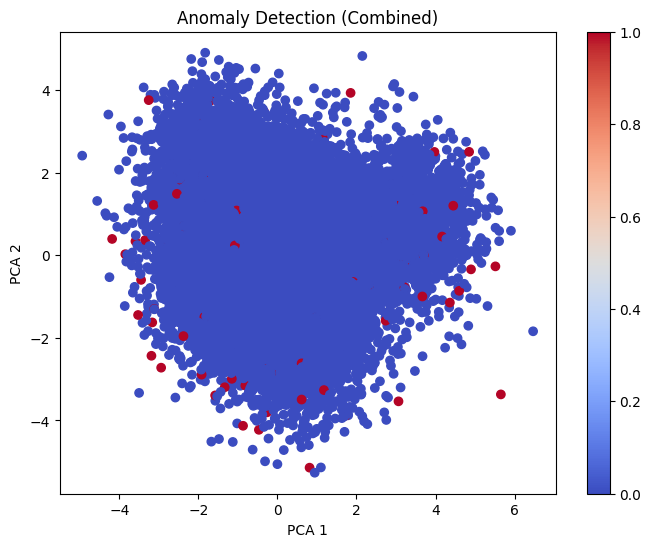

In [121]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df_results["Combined_Anomaly"], cmap="coolwarm")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Anomaly Detection (Combined)")
plt.colorbar()
plt.show()


In [122]:
anomalies_common = df[df_results["Combined_Anomaly"] == True]
print(anomalies_common.head(10))


      Battery Voltage (V)  Battery Current (A)  State of Charge (%)  \
94              24.255969             9.973476            30.615463   
192             25.224734            -1.432846            72.621352   
363             22.451779            -4.089389            40.951214   
582             21.963028            -3.859566            51.860832   
938             25.924668             1.733175            45.344945   
968             25.329391            -4.260513            53.477134   
972             28.216430             5.776803            78.546545   
1206            24.263712            -2.340257            27.658660   
1836            29.378957            -1.431998            28.094895   
2122            24.663413           -10.922362            86.841228   

      Solar Panel Voltage (V)  Solar Panel Current (A)  \
94                  42.145879                 2.379416   
192                 37.812318                 2.091909   
363                 48.359162               

In [123]:
anomalies_iso = df[df_results["IsolationForest"] == -1]
anomalies_lof = df[df_results["LocalOutlierFactor"] == -1]

print("Unique to Isolation Forest:", len(anomalies_iso) - len(anomalies_common))
print("Unique to LOF:", len(anomalies_lof) - len(anomalies_common))


Unique to Isolation Forest: 1651
Unique to LOF: 1651


In [141]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv(r"C:\Users\mades\Downloads\satellite dataset\Original dataset\satellite_telemetry_data.csv")  

# Drop missing values
df.dropna(inplace=True)

# Drop Timestamp column if it exists
if "Timestamp" in df.columns:
    df.drop(["Timestamp"], axis=1, inplace=True)

# Convert categorical column into numerical features
df = pd.get_dummies(df, columns=["Spectral Sensor Health"], drop_first=True)

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Initialize Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)

# Fit Isolation Forest and predict anomalies
iso_pred = iso_forest.fit_predict(scaled_data)  # -1 (anomaly), 1 (normal)

# Convert predictions to DataFrame
df_results = pd.DataFrame({
    "IsolationForest": iso_pred
})

# Count anomalies detected
anomalies_iso = sum(df_results["IsolationForest"] == -1)

# Print results
print("Anomalies detected by Isolation Forest:", anomalies_iso)

# Save results to a CSV file
df_results.to_csv("anomaly_results.csv", index=False)


Anomalies detected by Isolation Forest: 2000


In [142]:
import joblib
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest

# Fit the model (Make sure you have `scaled_data` prepared)
# Save the trained model
joblib.dump(iso_forest, "isolation_forest_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [143]:
!streamlit run str1.py

^C


## New 

In [2]:
from sklearn.ensemble import IsolationForest

import pandas as pd
df = pd.read_csv(r"C:\Users\mades\Downloads\satellite dataset\Original dataset\satellite_telemetry_data.csv")
# Convert timestamp column if present
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Drop non-numeric columns (except timestamp for later analysis)
numeric_df = df.select_dtypes(include=['number']).dropna()

# Initialize Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Fit the model and predict anomalies (-1 = anomaly, 1 = normal)
numeric_df['Anomaly'] = iso_forest.fit_predict(numeric_df)

# Count anomalies
anomaly_count = numeric_df['Anomaly'].value_counts()
anomaly_count


C:\Users\mades\AppData\Local\Temp\ipykernel_13824\4038979395.py:7: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


Anomaly
 1    92302
-1     7698
Name: count, dtype: int64

In [3]:
df.shape

(100000, 40)

In [4]:
numeric_df

,Battery Voltage (V),Battery Current (A),State of Charge (%),Solar Panel Voltage (V),Solar Panel Current (A),Solar Panel Efficiency (%),Power Consumption (W),Internal Temperature (C),Battery Temperature (C),Solar Panel Temperature (C),...,Redundant Sensor Discrepancies (0/1),Thruster Malfunctions (0/1),Thruster Efficiency (%),Satellite Orientation (°),Data Throughput (Mbps),Power System Anomalies (0/1),Thermal System Anomalies (0/1),AOCS Faults (0/1),Payload Failures (0/1),Anomaly
0,27.663657,1.198668,49.747676,34.450280,1.538837,78.858183,287.625076,27.425388,29.336524,31.265584,...,0,0,95.550449,85.803526,72.383849,0,0,0,0,1
1,23.690421,5.256486,60.799818,43.339668,2.876521,93.968375,421.761029,26.474492,25.216930,29.035849,...,0,0,99.384409,277.466628,19.009831,0,0,0,0,1
2,27.683408,1.148736,34.159514,39.441033,3.175850,83.388523,472.742796,23.836097,21.506227,22.684533,...,0,0,93.026799,348.796261,81.056144,0,0,0,0,1
3,24.693368,-1.915186,63.793816,49.520640,2.512940,95.186233,393.258005,21.737029,27.930695,44.812171,...,0,0,97.763768,107.071250,91.198533,0,0,0,0,1
4,26.866385,10.069036,60.840302,38.947523,2.261755,95.496608,480.209425,20.981227,21.729351,29.056744,...,0,0,93.447386,160.991069,52.074967,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,24.918752,-0.803144,52.951558,41.553782,3.510285,89.696518,173.477333,26.111055,28.657352,36.801562,...,0,0,89.712973,82.567854,54.518194,0,0,0,0,1
99996,25.480349,-2.227133,30.194564,40.195035,1.636767,97.769038,155.472934,24.425567,33.432067,30.358950,...,0,0,81.622488,99.944938,15.539072,0,0,0,0,1
99997,25.580797,-7.360854,69.631371,46.276700,1.892074,86.419607,471.957286,27.595192,21.751422,51.847639,...,0,0,94.950784,158.219524,13.588880,0,0,0,0,1
99998,26.127245,-1.561563,36.314000,48.322525,0.413896,82.278208,331.697548,29.569326,29.414988,35.719352,...,1,0,98.475454,332.004822,83.425422,0,0,0,0,1


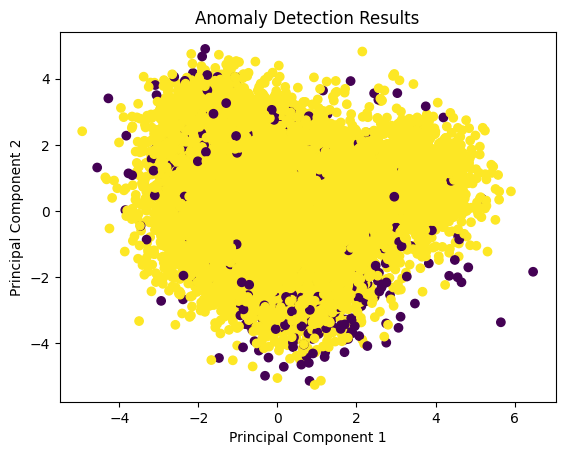

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"C:\Users\mades\Downloads\satellite dataset\Original dataset\satellite_telemetry_data.csv")

# Preprocess categorical data
df['Spectral Sensor Health'] = LabelEncoder().fit_transform(df['Spectral Sensor Health'])

# Drop timestamp (or extract time features if needed)
df.drop('Timestamp', axis=1, inplace=True)

# Normalize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Dimensionality reduction (optional)
pca = PCA(n_components=0.95)  # Retain 95% variance
reduced_data = pca.fit_transform(scaled_data)

# Train Isolation Forest
model = IsolationForest(
    n_estimators=100,
    contamination=0.01,  # Adjust based on expected anomalies
    random_state=42
)
anomalies = model.fit_predict(reduced_data)

# Add anomaly labels to the dataframe
df['Anomaly'] = anomalies  # -1 for anomalies, 1 for normal

# Visualize anomalies (example using two principal components)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=anomalies, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Anomaly Detection Results')
plt.show()

In [7]:
df['Anomaly'].value_counts()

Anomaly
 1    99000
-1     1000
Name: count, dtype: int64

In [8]:
from sklearn.metrics import classification_report

# Assuming 'Error Flags (0/1)' is the ground truth
y_true = df['Error Flags (0/1)']
y_pred = [1 if x == -1 else 0 for x in anomalies]  # Convert Isolation Forest labels

print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     97963
           1       0.07      0.03      0.04      2037

    accuracy                           0.97    100000
   macro avg       0.52      0.51      0.52    100000
weighted avg       0.96      0.97      0.97    100000



## Model Tuning:

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
import joblib

# 📌 Load Health Monitoring Dataset
file_path = r"C:\Users\mades\Downloads\Expanded_Sample_std.csv"  # Update with actual file
df = pd.read_csv(file_path)

# 📌 Remove non-numeric columns (like ID, timestamps)
df = df.select_dtypes(include=[np.number])  

# 📌 Extract feature columns (excluding any "Anomaly" column)
feature_columns = [col for col in df.columns if "Anomaly" not in col]

# 📌 Standardize the Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[feature_columns])

# Save the scaler for future use
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [11]:
# Define hyperparameter search space
param_grid = {
    "n_estimators": [100, 200, 300],  
    "contamination": [0.1, 0.15, 0.2],  
    "max_samples": [0.5, 0.75, 1.0],  
    "max_features": [0.5, 0.75, 1.0]  
}

best_model = None
best_score = -np.inf  # Track the best score

# Loop through different hyperparameter combinations
for n in param_grid["n_estimators"]:
    for c in param_grid["contamination"]:
        for ms in param_grid["max_samples"]:
            for mf in param_grid["max_features"]:
                
                # Train Isolation Forest
                iso_forest = IsolationForest(
                    n_estimators=n, 
                    contamination=c, 
                    max_samples=ms, 
                    max_features=mf, 
                    random_state=42
                )
                iso_forest.fit(df_scaled)

                # Predict anomalies (-1 → anomaly, 1 → normal)
                preds = iso_forest.predict(df_scaled)
                preds = np.where(preds == -1, 1, 0)  # Convert to 1 (Anomaly) & 0 (Normal)

                # If ground truth labels exist, use F1-score
                if "Anomaly" in df.columns:
                    f1 = f1_score(df["Anomaly"], preds)
                    if f1 > best_score:
                        best_score = f1
                        best_model = iso_forest
                        best_params = (n, c, ms, mf)

# Save the best model
joblib.dump(best_model, "best_health_isolation_forest.pkl")

# Display best parameters
if best_model:
    print(f"✅ Best Model Found: n_estimators={best_params[0]}, contamination={best_params[1]}, "
          f"max_samples={best_params[2]}, max_features={best_params[3]}")


✅ Best Model Found: n_estimators=200, contamination=0.2, max_samples=0.5, max_features=1.0


In [22]:
# Load the saved model
iso_forest = joblib.load("best_health_isolation_forest.pkl")

# Load the saved scaler
scaler = joblib.load("scaler.pkl")

# Load new health monitoring input data
new_input_df = pd.read_csv(r"C:\Users\mades\Downloads\s1.csv")
# scaler = StandardScaler()

# Standardize new input data
new_input_scaled = scaler.fit_transform(new_input_df)

# Predict anomalies
predictions = iso_forest.predict(new_input_scaled)
predictions = np.where(predictions == -1, 1, 0)  # Convert -1 to 1 (Anomaly), 1 to 0 (Normal)

# Display results
for i, pred in enumerate(predictions):
    print(f"Data Point {i+1}: {'Anomaly 🚨' if pred == 1 else 'Normal ✅'}")


Data Point 1: Anomaly 🚨
Data Point 2: Normal ✅
Data Point 3: Normal ✅
Data Point 4: Normal ✅
Data Point 5: Normal ✅
Data Point 6: Normal ✅
Data Point 7: Normal ✅
Data Point 8: Normal ✅
Data Point 9: Normal ✅
Data Point 10: Normal ✅
Data Point 11: Normal ✅
Data Point 12: Anomaly 🚨
Data Point 13: Normal ✅
Data Point 14: Anomaly 🚨
Data Point 15: Normal ✅
Data Point 16: Anomaly 🚨
Data Point 17: Anomaly 🚨
Data Point 18: Normal ✅
Data Point 19: Normal ✅
Data Point 20: Normal ✅
Data Point 21: Normal ✅
Data Point 22: Normal ✅
Data Point 23: Normal ✅
Data Point 24: Normal ✅
Data Point 25: Normal ✅


In [14]:
df_scaled

array([[-3.31360353,  0.31047742,  1.06336679, ..., -0.0922045 ,
        -0.11053264, -0.07257825],
       [-2.18014069, -0.02070813,  0.60669954, ..., -0.0922045 ,
        -0.11053264, -0.07257825],
       [-0.01092378,  0.22179291, -1.65384814, ..., -0.0922045 ,
        -0.11053264, -0.07257825],
       ...,
       [ 1.24014652, -0.08997268, -0.72591376, ..., -0.0922045 ,
         9.04710127, -0.07257825],
       [-1.17100818,  0.20410781,  0.71462739, ..., -0.0922045 ,
        -0.11053264, -0.07257825],
       [-1.71014474,  0.97236629, -0.12587478, ..., -0.0922045 ,
        -0.11053264, -0.07257825]])

In [1]:
import pandas as pd
d = pd.read_csv(r"C:\Users\mades\Downloads\s1.csv")

d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Battery Voltage (V)                   25 non-null     float64
 1   Battery Current (A)                   25 non-null     float64
 2   State of Charge (%)                   25 non-null     float64
 3   Solar Panel Voltage (V)               25 non-null     float64
 4   Solar Panel Current (A)               25 non-null     float64
 5   Solar Panel Efficiency (%)            25 non-null     float64
 6   Power Consumption (W)                 25 non-null     float64
 7   Internal Temperature (C)              25 non-null     float64
 8   Battery Temperature (C)               25 non-null     float64
 9   Solar Panel Temperature (C)           25 non-null     float64
 10  Radiator Temperature (C)              25 non-null     float64
 11  Radiator Efficiency (

## Streamlit Dashboard

In [ ]:
import mysql.connector
import pandas as pd
import joblib
import streamlit as st
import numpy as np
import time
import smtplib
import random
from datetime import datetime, timedelta
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configuration
DIGITAL_TWIN_VERSION = "4.0"
SYSTEM_ID = "SAT-2025-DT-001"
DB_CONFIG = {
    "host": "localhost",
    "user": "root",
    "password": "Madesh6554@12",
    "database": "satellite_data",
    "table": "real_time_data_3"
}
MODEL_PATH = "best_health_isolation_forest.pkl"
ALERT_CONFIG = {
    "sender": "mass1441m2@gmail.com",
    "receiver": "madesh6554@gmail.com",
    "password": "vozt twrn pldb vfco"
}

class DatabaseManager:
    def __enter__(self):
        self.conn = mysql.connector.connect(
            host=DB_CONFIG["host"],
            user=DB_CONFIG["user"],
            password=DB_CONFIG["password"],
            database=DB_CONFIG["database"]
        )
        return self.conn.cursor()
    
    def __exit__(self, exc_type, exc_val, exc_tb):
        self.conn.commit()
        self.conn.close()

class DataGenerator:
    def __init__(self):
        self.last_timestamp = datetime.now() - timedelta(minutes=1)
        self.param_config = {
            "timestamp": None,
            "battery_voltage": (24, 32, 28, 1.5),
            "battery_current": (3, 7, 5, 0.5),
            "state_of_charge": (60, 100, 80, 3),
            "solar_panel_voltage": (90, 110, 100, 5),
            "solar_panel_current": (6, 10, 8, 0.5),
            "solar_panel_efficiency": (15, 28, 22, 2),
            "power_consumption": (120, 180, 150, 10),
            "internal_temp": (15, 35, 25, 3),
            "battery_temp": (25, 35, 30, 2),
            "solar_panel_temp": (30, 50, 40, 5),
            "radiator_temp": (15, 25, 20, 2),
            "radiator_efficiency": (75, 95, 85, 3),
            "thermal_gradient": (3, 7, 5, 1),
            "position": (300, 500, 400, 50),
            "velocity": (7.4, 7.8, 7.6, 0.1),
            "gyroscope": (0.03, 0.07, 0.05, 0.01),
            "magnetometer_rpm": (4800, 5200, 5000, 100),
            "reaction_wheel_rpm": (2900, 3100, 3000, 50),
            "thruster_status": (0, 1, 0.95),
            "signal_strength": (-80, -60, -70, 5),
            "data_rate": (90, 110, 100, 5),
            "packet_loss": (0, 5, 0.5, 0.2),
            "payload_power": (45, 55, 50, 2),
            "sensor_data_rate": (9, 11, 10, 0.5),
            "camera_temp": (10, 20, 15, 2),
            "data_quality": (95, 100, 98, 1),
            "error_flags": (0, 1, 0.97),
            "latency": (100, 300, 200, 50),
            "bit_error_rate": (1e-7, 1e-5, 1e-6, 5e-7),
            "sensor_discrepancies": (0, 1, 0.98),
            "thruster_malfunctions": (0, 1, 0.99),
            "thruster_efficiency": (90, 100, 95, 2),
            "orientation": (-10, 10, 0, 5),
            "throughput": (90, 100, 95, 2),
            "power_anomalies": (0, 1, 0.95),
            "thermal_anomalies": (0, 1, 0.95),
            "aocs_faults": (0, 1, 0.95),
            "payload_failures": (0, 1, 0.95)
        }

    def _generate_value(self, config):
        if len(config) == 4:
            min_val, max_val, mean, std = config
            return np.clip(random.gauss(mean, std), min_val, max_val)
        return 0 if random.random() < config[2] else 1

    def generate_data_point(self):
        self.last_timestamp += timedelta(minutes=1)
        data = {"timestamp": self.last_timestamp}
        for param, config in self.param_config.items():
            if param != "timestamp":
                data[param] = self._generate_value(config)
        if random.random() < 0.07:
            anomaly_type = random.choice(["power", "thermal", "aocs", "payload"])
            if anomaly_type == "power":
                data["battery_voltage"] *= 0.6
                data["power_anomalies"] = 1
            elif anomaly_type == "thermal":
                data["internal_temp"] += 20
                data["thermal_anomalies"] = 1
            elif anomaly_type == "aocs":
                data["gyroscope"] *= 10
                data["aocs_faults"] = 1
            else:
                data["payload_failures"] = 1
                data["data_quality"] = 0
        return data

class AnomalyDetector:
    def __init__(self):
        self.model = joblib.load(MODEL_PATH)
        self.scaler = MinMaxScaler()
        self.features = [
            "battery_voltage", "battery_current", "state_of_charge",
            "solar_panel_voltage", "solar_panel_current", "solar_panel_efficiency",
            "power_consumption", "internal_temp", "battery_temp",
            "solar_panel_temp", "radiator_temp", "radiator_efficiency",
            "thermal_gradient", "position", "velocity", "gyroscope",
            "magnetometer_rpm", "reaction_wheel_rpm", "thruster_status",
            "signal_strength", "data_rate", "packet_loss", "payload_power",
            "sensor_data_rate", "camera_temp", "data_quality", "error_flags",
            "latency", "bit_error_rate", "sensor_discrepancies",
            "thruster_malfunctions", "thruster_efficiency", "orientation",
            "throughput", "power_anomalies", "thermal_anomalies",
            "aocs_faults", "payload_failures"
        ]

    def predict(self, data):
        df = pd.DataFrame([data])
        scaled_data = self.scaler.fit_transform(df[self.features])
        return self.model.predict(scaled_data)[0] == -1

class AlertSystem:
    def send_alert(self, data):
        try:
            msg = MIMEMultipart()
            msg['From'] = ALERT_CONFIG["sender"]
            msg['To'] = ALERT_CONFIG["receiver"]
            msg['Subject'] = f"🚨 {SYSTEM_ID} Anomaly Alert - {data['timestamp']}"
            body = f"""
            CRITICAL ANOMALY DETECTED!
            System: {SYSTEM_ID}
            Timestamp: {data['timestamp']}
            Key Parameters:
            - Battery Voltage: {data['battery_voltage']:.2f} V
            - Internal Temperature: {data['internal_temp']:.1f}°C
            - Gyroscope: {data['gyroscope']:.4f} rad/s
            - Data Quality: {data['data_quality']:.1f}%"""
            msg.attach(MIMEText(body, 'plain'))
            server = smtplib.SMTP('smtp.gmail.com', 587)
            server.starttls()
            server.login(ALERT_CONFIG["sender"], ALERT_CONFIG["password"])
            server.sendmail(ALERT_CONFIG["sender"], ALERT_CONFIG["receiver"], msg.as_string())
            server.quit()
        except Exception as e:
            st.error(f"Alert failed: {str(e)}")

class SatelliteDashboard:
    def __init__(self, data_generator):
        self.generator = data_generator
        st.set_page_config(page_title=f"{SYSTEM_ID} Monitor", layout="wide")
        st.title(f"🌍 {SYSTEM_ID} Digital Twin Dashboard")
        self.status_container = st.empty()
        self.metrics_container = st.container()
        self.chart_container = st.empty()
        st.sidebar.button("🔄 Manual Refresh", key="refresh")
        if 'history' not in st.session_state:
            self._load_initial_data()

    def _load_initial_data(self):
        with DatabaseManager() as cursor:
            cursor.execute(f"SELECT * FROM {DB_CONFIG['table']} ORDER BY timestamp DESC LIMIT 10")
            st.session_state.history = [dict(zip([col[0] for col in cursor.description], row)) for row in cursor.fetchall()]

    def update_display(self, data, anomaly):
        self._update_status(data, anomaly)
        self._update_metrics(data)
        self._update_charts()

    def _update_status(self, data, anomaly):
        status_color = "#FF4B4B" if anomaly else "#0F9D58"
        self.status_container.markdown(f"""
            <div style="padding:20px; background:{status_color}10; border-radius:10px; margin-bottom:20px;
                        border-left:5px solid {status_color}; box-shadow: 0 2px 4px rgba(0,0,0,0.1)">
                <h2 style="color:{status_color}; margin:0;">
                    {'🚨 CRITICAL ANOMALY DETECTED' if anomaly else '✅ SYSTEM NOMINAL'} 
                    <span style="float:right; font-size:0.8em; color:#666;">{DIGITAL_TWIN_VERSION}</span>
                </h2>
                <p style="margin:5px 0 0 0; color:#666;">
                    Last Update: {data['timestamp'].strftime('%Y-%m-%d %H:%M:%S UTC')}
                </p>
            </div>""", unsafe_allow_html=True)

    def _update_metrics(self, data):
        with self.metrics_container:
            st.subheader("🔑 Key System Metrics")
            cols = st.columns(4)
            metrics = [
                ("⚡ Power Systems", ['battery_voltage', 'solar_panel_voltage', 'power_consumption']),
                ("🌡 Thermal Systems", ['internal_temp', 'battery_temp', 'solar_panel_temp']),
                ("🛰 AOCS", ['gyroscope', 'orientation', 'reaction_wheel_rpm']),
                ("📡 Communications", ['signal_strength', 'data_rate', 'packet_loss'])
            ]
            for col, (title, params) in zip(cols, metrics):
                with col:
                    st.markdown(self._build_metric_card(title, params, data), unsafe_allow_html=True)

    def _build_metric_card(self, title, params, data):
        html = f"""
        <div style="padding:15px; background:#FFFFFF; border-radius:10px; border:1px solid #EEE; 
                    margin-bottom:20px; box-shadow:0 2px 4px rgba(0,0,0,0.05)">
            <h4 style="margin:0 0 15px 0; color:#2C3E50;">{title}</h4>"""
        for param in params:
            value = data[param]
            config = self.generator.param_config[param]
            min_val, max_val = (config[0], config[1]) if len(config) == 4 else (None, None)
            unit = self._get_unit(param)
            
            # Format value safely
            try:
                formatted_value = f"{float(value):.2f}{unit}" if isinstance(value, (int, float)) else f"{value}{unit}"
            except:
                formatted_value = f"{value}{unit}"
            
            alert = "⚠️" if (min_val and max_val and not (min_val <= value <= max_val)) else ""
            
            html += f"""
            <div style="margin-bottom:12px;">
                <div style="display:flex; justify-content:space-between; align-items:center;">
                    <span style="color:#666; font-size:0.9em;">{param.replace('_', ' ').title()}</span>
                    <span style="color:#FF4B4B;">{alert}</span>
                </div>
                <div style="font-size:1.4em; color:#2C3E50;">
                    {formatted_value}
                </div>
                <div style="font-size:0.8em; color:#888;">
                    Range: {min_val:.1f}-{max_val:.1f}{unit}
                </div>
            </div>"""
        return html + "</div>"

    def _update_charts(self):
        with self.chart_container:
            st.subheader("📈 Real-Time Telemetry Trends (Last 10 Readings)")
            df = pd.DataFrame(st.session_state.history[-10:]).set_index('timestamp')
            fig = make_subplots(rows=2, cols=2, subplot_titles=(
                'Battery Voltage (V)', 'Internal Temperature (°C)', 
                'Gyroscope (rad/s)', 'Data Quality (%)'))
            fig.add_trace(go.Scatter(x=df.index, y=df.battery_voltage, name='Battery', line=dict(color='#4285F4')), 1, 1)
            fig.add_trace(go.Scatter(x=df.index, y=df.internal_temp, name='Temp', line=dict(color='#DB4437')), 1, 2)
            fig.add_trace(go.Scatter(x=df.index, y=df.gyroscope, name='Gyro', line=dict(color='#0F9D58')), 2, 1)
            fig.add_trace(go.Scatter(x=df.index, y=df.data_quality, name='Quality', line=dict(color='#F4B400')), 2, 2)
            fig.update_layout(height=600, showlegend=False, margin=dict(l=40, r=40, t=80, b=40),
                            paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)')
            st.plotly_chart(fig, use_container_width=True)

    def _get_unit(self, param):
        units = {
            "voltage": "V", "current": "A", "temp": "°C", "efficiency": "%",
            "consumption": "W", "velocity": "km/s", "rpm": "RPM",
            "rate": "Mbps", "loss": "%", "error": "bps", "orientation": "°"
        }
        return next((v for k, v in units.items() if k in param.lower()), "")

def main():
    generator = DataGenerator()
    detector = AnomalyDetector()
    alert = AlertSystem()
    dashboard = SatelliteDashboard(generator)

    if 'last_update' not in st.session_state:
        st.session_state.update({
            'last_update': datetime.min,
            'history': [],
            'data': None,
            'anomaly': False
        })

    if (datetime.now() - st.session_state.last_update).total_seconds() >= 2:
        try:
            new_data = generator.generate_data_point()
            anomaly = detector.predict(new_data)
            
            # Add anomaly status to data
            new_data['anomaly'] = int(anomaly)

            with DatabaseManager() as cursor:
                # Insert with anomaly column
                columns = list(new_data.keys())
                values = list(new_data.values())
                cursor.execute(
                    f"INSERT INTO {DB_CONFIG['table']} ({', '.join(columns)}) VALUES ({', '.join(['%s']*len(values))})",
                    values
                )

            # Keep only last 10 entries
            st.session_state.history = [new_data] + st.session_state.history[:9]
            
            st.session_state.update({
                'last_update': datetime.now(),
                'data': new_data,
                'anomaly': anomaly
            })
            
            if anomaly:
                alert.send_alert(new_data)

        except Exception as e:
            st.error(f"System Error: {str(e)}")

    if st.session_state.data:
        dashboard.update_display(st.session_state.data, st.session_state.anomaly)

    time.sleep(1)
    st.rerun()

if __name__ == "__main__":
    main()

In [1]:
pip install streamlit-extras


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/680.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/680.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/680.8 kB ? eta -:--:--
   --------------- ------------------------ 262.1/680.8 kB ? eta -:--:--
   --------------- ------------------------ 262.1/680.8 kB ? eta -:--:--
   ----------------------------- -------- 524.3/680.8 kB 509.0 kB/s eta 0:00:01
   ----------------------------- -------- 524.3/680.8 kB 509.0 kB/s eta 0:00:01
   -------------------------------------- 680.8/680.8 kB 515.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/635.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/635.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/635.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/635.4 kB ? eta -:--:--
   ------------

In [1]:
pip install --upgrade streamlit

Note: you may need to restart the kernel to use updated packages.


## Dashboard

In [2]:
!streamlit run qpp.py

^C
